# **Principal Component Analysis (PCA) auf dem Wine Dataset**

## **Daten laden**

Bei den Daten handelt es sich um die Ergebnisse einer chemischen Analyse von Weinen, die in derselben Region in Italien von drei verschiedenen Weinbauern angebaut wurden. Es wurden dreizehn verschiedene Messungen für verschiedene Inhaltsstoffe in den drei Weintypen vorgenommen.

Die Daten sind abrufbar über sklearn.

In [39]:
# Benötigte Pakete Laden

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#import matplotlib.cm as cm
#import plotly.express as px
#import plotly.graph_objects as go
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_wine

# Wine-Datensatz aus sklearn laden
wine = load_wine()
X = wine.data  # Features (178 Einträge x 13 Variablen/Features)
y = wine.target  # Klassen (0, 1, 2 für 3 Wein-Typen)

#print(wine.DESCR); # Gibt die vollständige Beschreibung des Datensatzes aus

## **Daten explorieren**

Der naheliegende erste Schritt ist, sich die Daten erst einmal auszugeben und anzusehen.

In [40]:
# Welche Form haben die Daten?
print("Shape of X:", X.shape);
print("Shape of y:", y.shape);

# dataframe erstellen
X_part = pd.DataFrame(wine.data, columns=wine.feature_names)
y_part = pd.Series(wine.target, name="target").map({0: 'class_0', 1: 'class_1', 2: 'class_2'})
wine_df = pd.concat([X_part, y_part], axis=1)

# Ausgabe der ersten 5 Zeilen
print("\nWine Data (5 Zeilen):")
print(wine_df.head())

# Beschreibung und statistische Übersicht der Kennzahlen
print("\nKennzahlen der Daten:")
print(wine_df.describe());

Shape of X: (178, 13)
Shape of y: (178,)

Wine Data (5 Zeilen):
   alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
0    14.23        1.71  2.43               15.6      127.0           2.80   
1    13.20        1.78  2.14               11.2      100.0           2.65   
2    13.16        2.36  2.67               18.6      101.0           2.80   
3    14.37        1.95  2.50               16.8      113.0           3.85   
4    13.24        2.59  2.87               21.0      118.0           2.80   

   flavanoids  nonflavanoid_phenols  proanthocyanins  color_intensity   hue  \
0        3.06                  0.28             2.29             5.64  1.04   
1        2.76                  0.26             1.28             4.38  1.05   
2        3.24                  0.30             2.81             5.68  1.03   
3        3.49                  0.24             2.18             7.80  0.86   
4        2.69                  0.39             1.82             4.32  1.04   

Die Daten enthalten 178 Einträge in 13 Dimensionen.

In [41]:
## Daten als CSV zum Download bereitstellen
#from google.colab import files
#wine_df.to_csv('Wine_Data.csv', index=False)  # CSV erstellen
#files.download('Wine_Data.csv')  # Download auslösen

### Boxplots

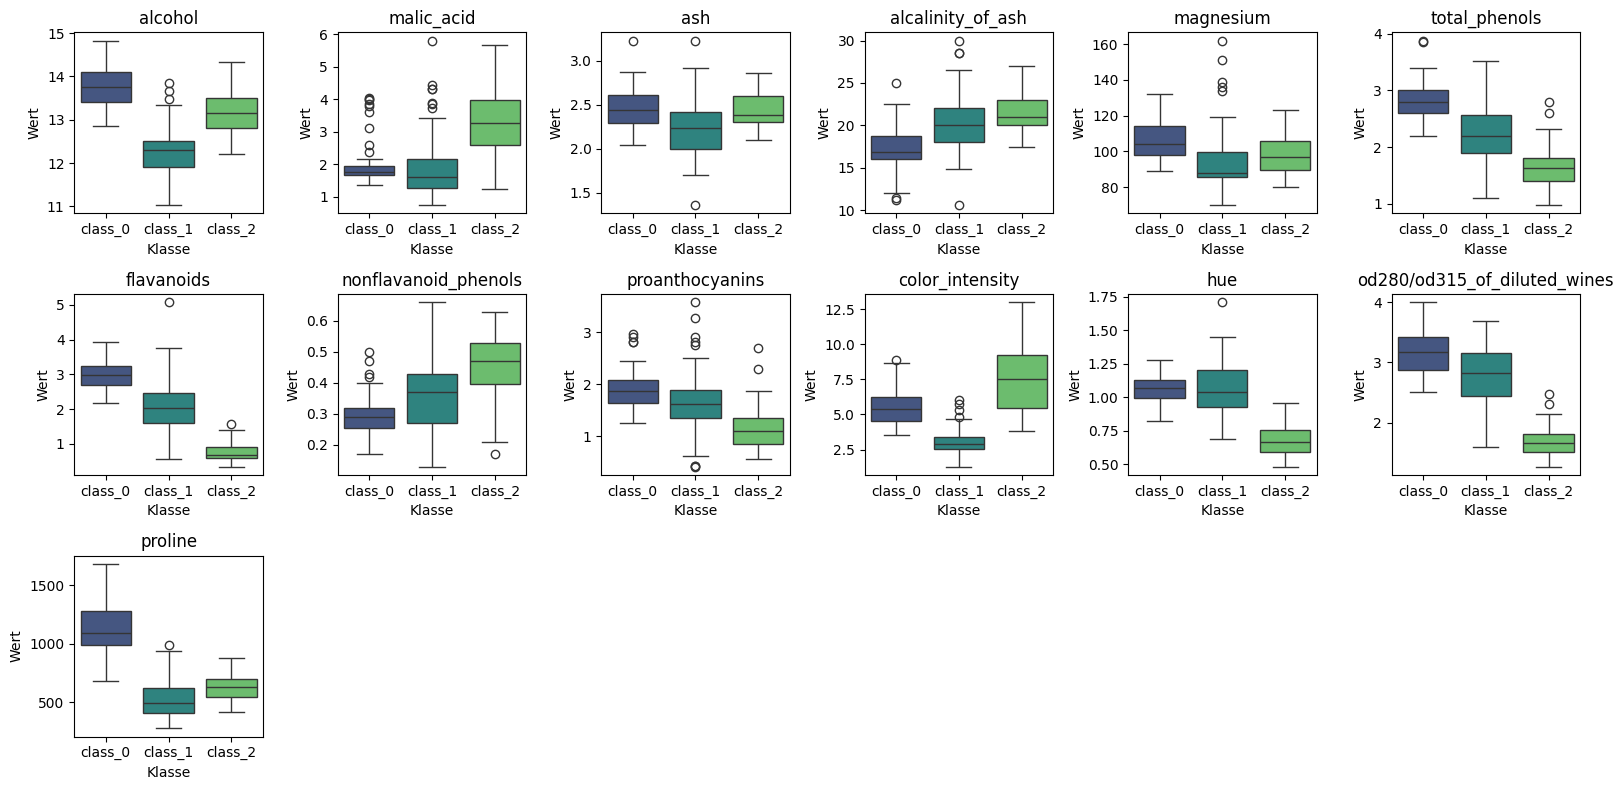

In [42]:
# Plot erstellen
plt.figure(figsize=(16, 8))  # Gesamtgröße der Figure

# Für jedes Feature einen Subplot erstellen
for i, feature in enumerate(wine.feature_names, 1):
    plt.subplot(3, 6, i)  # Anz. Zeilen, Anz. Spalten (für 13 Plots)
    sns.boxplot(x='target', y=feature, data=wine_df,
                hue='target',  # Farbe nach Target
                palette='viridis',  # Farbschema
                dodge=False)  # Boxplots nicht nebeneinander
    plt.title(f'{feature}', fontsize=12)
    plt.xlabel('Klasse', fontsize=10)
    plt.ylabel('Wert', fontsize=10)

plt.tight_layout()
plt.show()


### Pairplots

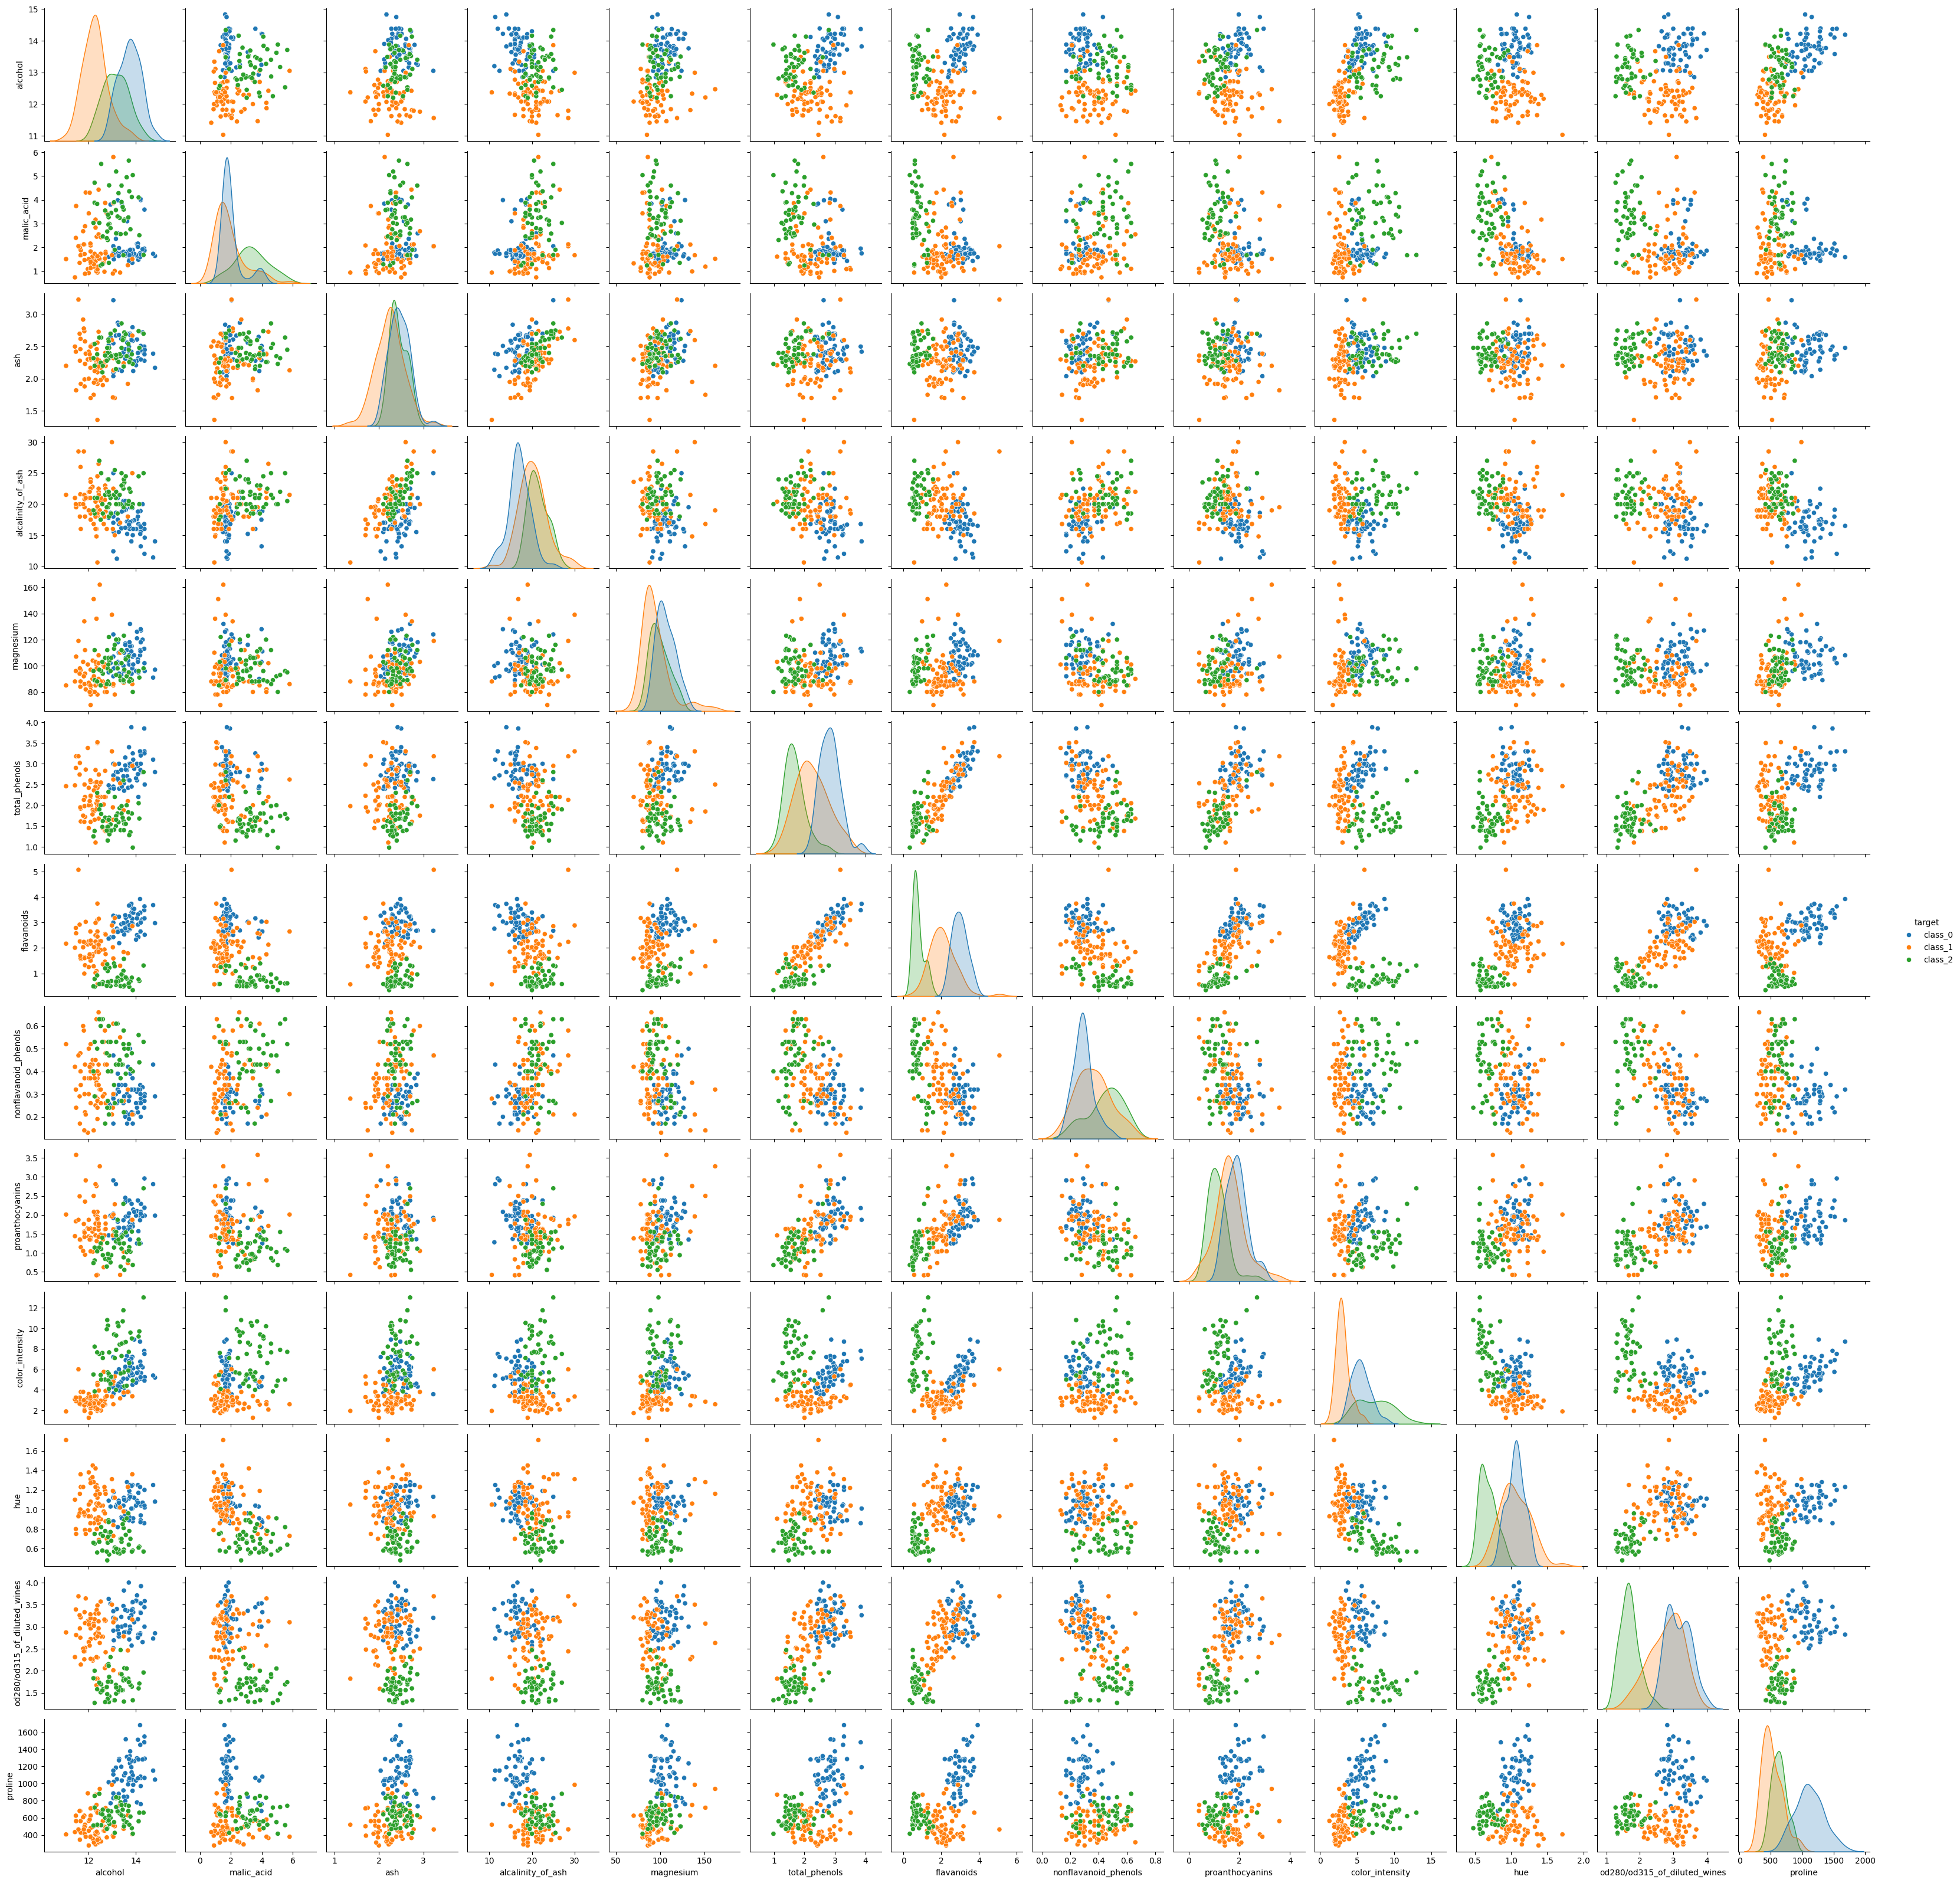

In [43]:
sns.pairplot(wine_df, hue='target')
plt.show()

## **PCA mit sklearn durchführen**
Die Schrittweise durchgeführte PCA folgt weiter unten

In [44]:
# Perform PCA
pca = PCA(n_components=0.95) # Als Kriterium wählen wir 95% erklärte Varianz. Das Kit bietet auch andere Möglichkeiten / Kriterien zur Auswahl
X_pca = pca.fit_transform(X_scaled)

# Anzahl der tatsächlich verwendeten Komponenten
print("Anzahl der Hauptkomponenten:", pca.n_components_)

Anzahl der Hauptkomponenten: 10


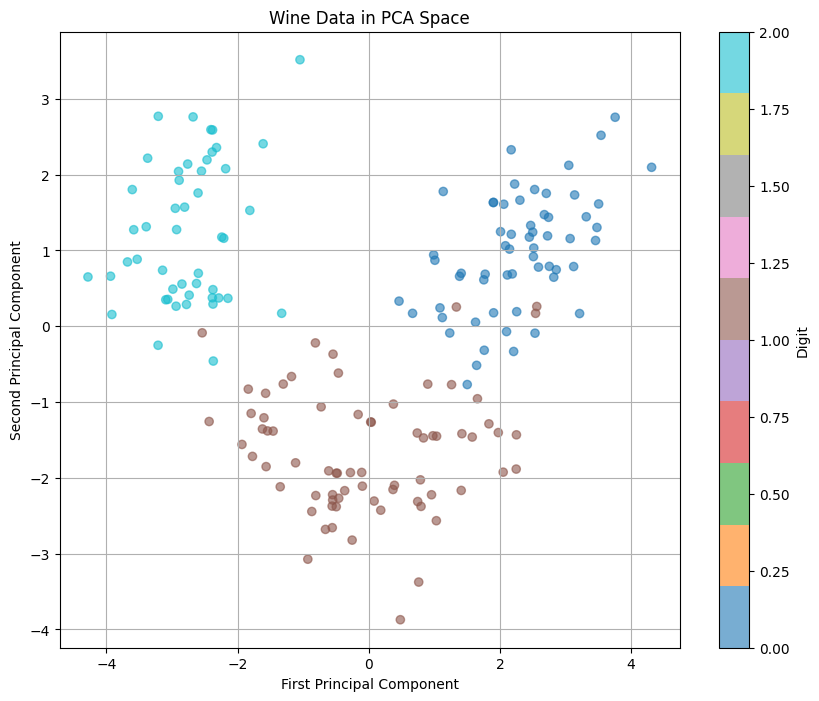

In [45]:
# Plot data against first two principal components
plt.figure(figsize=(10,8))
scatter = plt.scatter(X_pca[:,0], X_pca[:,1], c=y, cmap='tab10', alpha=0.6)
plt.colorbar(scatter, label='Digit')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.title('Wine Data in PCA Space')
plt.grid(True)
plt.show()

## **Daten zentrieren und standardisieren**


Bevor wir die Hauptkomponentenanalyse durchführen, zentrieren und standardisieren wir die Daten. Dabei werden alle Veriablen so transformiert, dass sie einen Mittelwert von 0 und eine Varianz von 1 haben.

Die Zentrierung ist wichtig für die Aussagekraft der PCA. Ohne Zentrierung würde die erste Hauptkomponente auf die Mitte der Daten zeigen.

Die standardisierung wird gemacht, damit alle Variablen gleich gewichtet in die Analyse eingehen.

In [46]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

## **Kovarianzmatrix berechnen**

Die Kovarianzmatrix beschreibt die linearen Beziehungen zwischen den einzelnen Variablen. Sie zeigt uns, wie stark zwei Variabeln gemeinsam variieren, also ob sie tendenziell gleichzeitig hohe oder niedrige Werte annehmen.

In der PCA wird die Kovarianzmatrix benötigt, um die Richtungen größter Varianz zu finden.

In [47]:
# Kovarianzmatrix berechnen
cov_matrix = np.cov(X_scaled.T)
print("Kovarianzmatrix-Form:", cov_matrix.shape)

Kovarianzmatrix-Form: (13, 13)


Bei vier Variablen hat die Kovarianzmatrix die Dimension 4×4, wobei die Diagonalelemente die Varianzen der einzelnen Variablen und die Nicht-Diagonalelemente die Kovarianzen zwischen den Variablenpaaren darstellen.

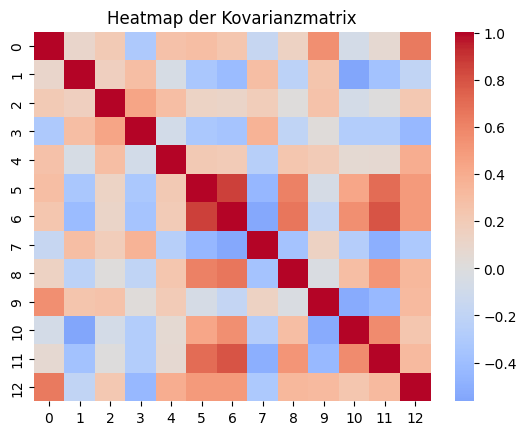

In [48]:
# Kovarianzmatrix plotten
sns.heatmap(cov_matrix, cmap="coolwarm", center=0)
plt.title("Heatmap der Kovarianzmatrix")
plt.show()

## **Eigenwerte und Eigenvektoren**


Wir berechnen nun die Eigenwerte und Eigenvektoren der Kovarianzmatrix. Die Eigenwerte geben an, wie viel Varianz jeweils durch eine Hauptkomponente erklärt wird. Die Eigenvektoren sind die Richtungen dieser Hauptkomponenten.

Basierend auf der Kovarianzmatrix lassen sich die Eigenwerte und und Eigenvektoren berechnen. Diese helfen dabei, Richtungen mit der größten Varianz in den Daten zu identifizieren.

Die **Eigenvektoren** definieren die Richtungen der neuen Hauptkomponentenachsen im ursprünglichen Merkmalsraum. Jeder Eigenvektor zeigt in die **Richtung der maximalen Varianz** für die entsprechende Hauptkomponente.

Die **Elemente eines Eigenvektors** zeigen an, wie stark jede der ursprünglichen Variablen zu der neuen Hauptkomponente beiträgt. Wenn ein Element eines Eigenvektors groß ist, bedeutet dies, dass die entsprechende ursprüngliche Variable einen starken Einfluss auf diese Hauptkomponente hat.

Die **Eigenwerte** geben die Varianz der Daten entlang der neuen Hauptkomponentenachsen an. Ein großer Eigenwert zeigt an, dass die zugehörige Hauptkomponente eine große Menge an Varianz in den Daten erklärt.

In [49]:
# Eigenwerte und Eigenvektoren berechnen
eigenvalues, eigenvectors = np.linalg.eigh(cov_matrix)

Wir möchten die Eigenvektoren bzw. Hauptkomponenten identifizieren, die den größten Anteil an Varianz in den Daten erklären. Dazu sortieren wir die Eigenwerte nach absteigender größe.

In [50]:
# Eigenwerte absteigend sortieren
sorted_idx = np.argsort(eigenvalues)[::-1]
eigenvalues = eigenvalues[sorted_idx]
eigenvectors = eigenvectors[:, sorted_idx]

num_av_components = len(eigenvectors)

In [51]:
# Loadings-Tabelle erstellen
variable_names = wine.feature_names;  # Namen Ihrer ursprünglichen Variablen

# Berechnungen
explained_variance = eigenvalues
variance_ratio = eigenvalues / eigenvalues.sum() * 100

# Ladungstabelle erstellen
loadings = pd.DataFrame(
    eigenvectors,
    index=variable_names,
    columns=[f'PC{i+1}' for i in range(eigenvectors.shape[1])]
)

# Varianz-Informationen als neue Zeilen hinzufügen
loadings.loc['---'] = ['---'] * len(loadings.columns)  # Trennzeile
loadings.loc['Erklärte Varianz'] = explained_variance
loadings.loc['Anteil (%)'] = variance_ratio

### Tabelle als CSV zum Download bereitstellen #####
#from google.colab import files
#
## Als CSV speichern
#loadings.to_csv("WineData-Loadings.csv", index=True)
#
## Download-Link anzeigen
#files.download('WineData-Loadings.csv')

## Loadings Tabelle ausgeben #####
print(loadings.to_markdown(floatfmt=".3f"))

|                              | PC1                  | PC2                   | PC3                  | PC4                  | PC5                  | PC6                   | PC7                  | PC8                  | PC9                  | PC10                  | PC11                 | PC12                 | PC13                  |
|:-----------------------------|:---------------------|:----------------------|:---------------------|:---------------------|:---------------------|:----------------------|:---------------------|:---------------------|:---------------------|:----------------------|:---------------------|:---------------------|:----------------------|
| alcohol                      | -0.1443293954060114  | -0.483651547817214    | -0.2073826241163567  | 0.01785630145550627  | -0.26566365292337    | -0.21353864800907932  | 0.05639635803487412  | -0.3961392584577891  | 0.5086191162648708   | 0.21160472708141384   | 0.22591696213675005  | 0.2662864508460614   | -0.0149699706388

### Scree Plot

Ein Scree-Plot zeigt die Eigenwerte in absteigender Reihenfolge. So erkennt man, wie viel Varianz jede Komponente erklärt.

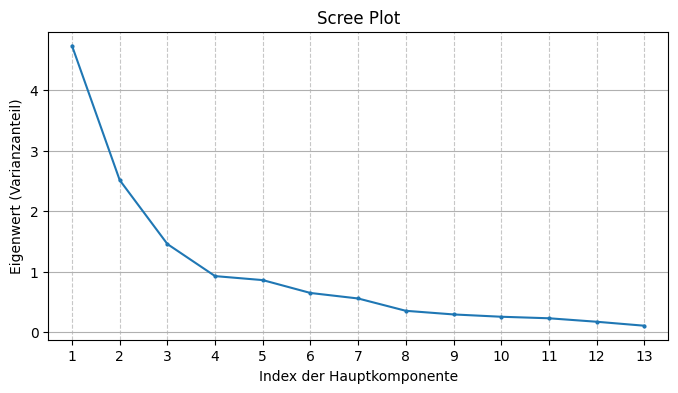

In [52]:
# Schritt 6: Scree-Plot und Auswahl der PCs
plt.figure(figsize=(8, 4))
plt.plot(np.arange(1, num_av_components+1), eigenvalues[:num_av_components], 'o-',markersize=2)

# Beschriftungen anpassen
plt.xlabel('Index der Hauptkomponente')
plt.ylabel('Eigenwert (Varianzanteil)')
plt.title('Scree Plot')

# X-Achse konfigurieren
plt.xticks(np.arange(1, num_av_components+1))  # Nur Ticks bei 1-5
plt.xlim(0.5, num_av_components + 0.5)  # Kleiner Rand links/rechts

# Grid nur bei den X-Ticks
plt.grid(True, axis='y')  # Horizontale Gridlines immer
plt.grid(True, axis='x', which='major', linestyle='--', alpha=0.7)  # Nur bei Haupt-Ticks

plt.show()

## **Auswahl der Hauptkomponenten**

Wenn die Hauptkomponenten bekannt sind, muss entschieden werden, wieviele davon herangezogen werden sollen um die Daten zu beschreiben. In diesem Schritt findet die eigentliche Dimesionsreduktion statt. Dabei muss berücksichtigt werden, dass mit der Dimensionsreduktion auch immer ein Informationsverlust einhergeht.

Ein zuverlässiges Kriterium ist die kumulierte Varianz. Dabei wird geschaut, wieviele Hauptkomponenten benötigt werden um 90% bzw 95% der Varianz in den Daten zu beschreiben.

### Kumulierte Varianz

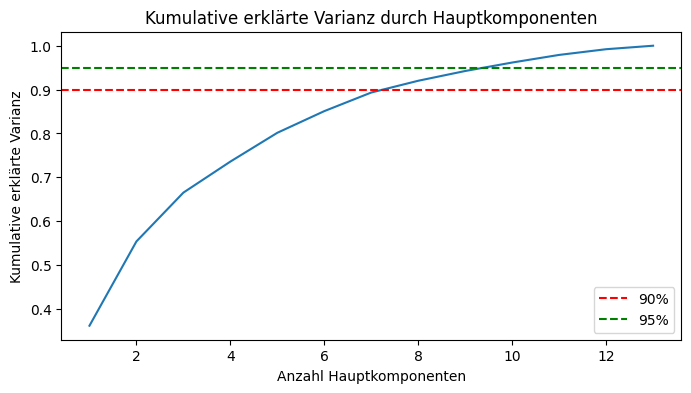

In [53]:
# Kumulierte erklärte Varianz berechnen
explained_variance_ratio = eigenvalues / np.sum(eigenvalues)
cumulative_variance = np.cumsum(explained_variance_ratio)

# Plot der kumulierten Varianz
plt.figure(figsize=(8, 4))

plt.plot(np.arange(1, len(cumulative_variance) + 1),
         cumulative_variance,
         linestyle='-',  # Durchgezogene Linie (Standard)
         linewidth=1.5   # Etwas dickere Linie für bessere Sichtbarkeit
)

plt.axhline(y=0.90, color='r', linestyle='--', label='90%')
plt.axhline(y=0.95, color='g', linestyle='--', label='95%')
plt.xlabel('Anzahl Hauptkomponenten')
plt.ylabel('Kumulative erklärte Varianz')
plt.title('Kumulative erklärte Varianz durch Hauptkomponenten')
plt.legend()
#plt.grid(True)
plt.show()

In [54]:
# Komponentenanzahl für 90 % bzw. 95 % Varianz bestimmen
n_90 = np.argmax(cumulative_variance >= 0.90) + 1
n_95 = np.argmax(cumulative_variance >= 0.95) + 1
print(f"Anzahl Komponenten für 90% erklärte Varianz: {n_90}")
print(f"Anzahl Komponenten für 95% erklärte Varianz: {n_95}")

Anzahl Komponenten für 90% erklärte Varianz: 8
Anzahl Komponenten für 95% erklärte Varianz: 10


## **Projektion der Daten**


Die standardisierten Daten werden nun auf die gewählten Hauptkomponenten projiziert. Dadurch erhalten wir eine Darstellung der Daten in einem neuen Merkmalsraum mit reduzierter Dimensionalität. Mathematisch wird dies durch Matrixmultiplikation mit den ausgewählten Eigenvektoren umgesetzt.

In [55]:
num_components = n_95; # n_90 bei 90% erklaerter Varianz

X_pca = X_scaled.dot(eigenvectors[:, :num_components])
print("Projizierte Datenform:", X_pca.shape)



## Tabelle als CSV zum Download bereitstellen #####
from google.colab import files

n_components = X_pca.shape[1]

# in dataframe umwandeln
X_pca_df = pd.DataFrame(
    data = X_pca,
    columns = [f"PC{i+1}" for i in range(n_components)])

# Die ersten 15 Zeilen der projizierten Daten ausgeben
print(X_pca_df.head(15).to_markdown(floatfmt=".3f"))

Projizierte Datenform: (178, 10)
|    |    PC1 |    PC2 |    PC3 |    PC4 |    PC5 |    PC6 |    PC7 |    PC8 |    PC9 |   PC10 |
|---:|-------:|-------:|-------:|-------:|-------:|-------:|-------:|-------:|-------:|-------:|
|  0 | -3.317 | -1.443 | -0.166 |  0.216 |  0.693 | -0.224 | -0.596 |  0.065 |  0.641 |  1.021 |
|  1 | -2.209 |  0.333 | -2.026 |  0.291 | -0.258 | -0.927 | -0.054 |  1.024 | -0.309 |  0.160 |
|  2 | -2.517 | -1.031 |  0.983 | -0.725 | -0.251 |  0.549 | -0.424 | -0.344 | -1.178 |  0.113 |
|  3 | -3.757 | -2.756 | -0.176 | -0.568 | -0.312 |  0.114 |  0.383 |  0.644 |  0.053 |  0.239 |
|  4 | -1.009 | -0.870 |  2.027 |  0.410 |  0.298 | -0.407 | -0.444 |  0.417 |  0.327 | -0.078 |
|  5 | -3.050 | -2.122 | -0.629 |  0.516 | -0.632 |  0.123 | -0.402 |  0.395 | -0.152 | -0.102 |
|  6 | -2.449 | -1.175 | -0.977 |  0.066 | -1.028 | -0.620 | -0.053 | -0.372 | -0.457 |  1.017 |
|  7 | -2.059 | -1.609 |  0.146 |  1.193 |  0.077 | -1.440 | -0.032 |  0.233 |  0.123 |  0.736

In [56]:
### Transformierte Daten als CSV zum Download bereitstellen ###
# Als CSV speichern
X_pca_df.to_csv("WineData-PCA.csv", index=True)

# Download-Link anzeigen
files.download('WineData-PCA.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## **Visualisierung der projizierten Daten**

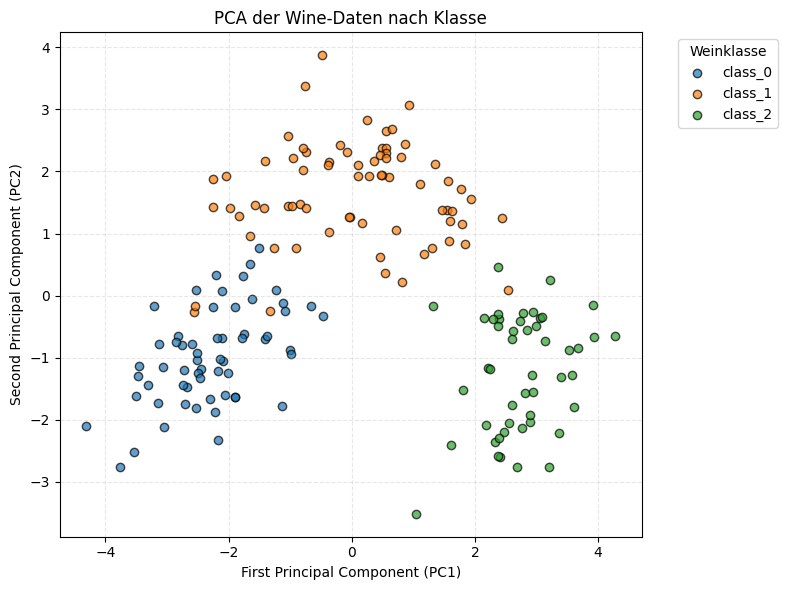

In [57]:
target_names = wine.target_names

# Plot erstellen
plt.figure(figsize=(8, 6))

# Scatter-Plot mit Farben nach Klasse und Legenden-Labels
for class_id, class_name in enumerate(target_names):
    plt.scatter(
        X_pca[y == class_id, 0],  # PC1 für diese Klasse
        X_pca[y == class_id, 1],  # PC2 für diese Klasse
        label=class_name,
        alpha=0.7,
        edgecolor='k'
    )

# Titel und Achsen
plt.xlabel('First Principal Component (PC1)')
plt.ylabel('Second Principal Component (PC2)')
plt.title('PCA der Wine-Daten nach Klasse')
plt.grid(True, linestyle='--', alpha=0.3)

# Legende statt Colorbar
plt.legend(title="Weinklasse", bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()  # Verhindert Überlappungen
plt.show()